In [1]:
!pip install emnist
import emnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x_train, y_train = emnist.extract_training_samples('letters')
x_test, y_test = emnist.extract_test_samples('letters')

In [3]:
#float it
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

I started with only one vgg1 block and got 92.33 percent test accuracy after 10 epochs, then went on to four vgg blocks with Batch Normalization and Dropout. This achieved 94.81 percent test accuracy after 10 epochs. All these values vary slightly with initialization. I wanted to see the metrics over a longer period, so I trained it over 100 epoch. Of course, there were signs of overfitting on the loss curve and the validation accuracy stabilizes and plateaus around 20 to 40 epochs.

These results didn't suprise me that much. The emnist dataset is just like mnist, just with letters. So it is pretty simple to classify, especially with a cnn of this caliber. Im sure that if I optimized the number of fully connected neurons and other parameters in the model it could achieve higher accuracy. 

In [33]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), input_shape = (28, 28, 1), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.2),

  tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_uniform', activation='relu', padding='same'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPool2D((2, 2)),
  tf.keras.layers.Dropout(0.2),
  

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_uniform'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(.2),
  tf.keras.layers.Dense(27, activation='softmax') 
])
optim = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9) 
model.compile(optimizer = optim, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
#sparse categorical crossentropy allows us to use integeras 

In [34]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
3120/3120 [==============================] - 26s 8ms/step - loss: 0.5466 - accuracy: 0.8300 - val_loss: 0.2136 - val_accuracy: 0.9296
Epoch 2/10
3120/3120 [==============================] - 24s 8ms/step - loss: 0.2781 - accuracy: 0.9081 - val_loss: 0.1997 - val_accuracy: 0.9329
Epoch 3/10
3120/3120 [==============================] - 24s 8ms/step - loss: 0.2344 - accuracy: 0.9218 - val_loss: 0.1698 - val_accuracy: 0.9415
Epoch 4/10
3120/3120 [==============================] - 23s 7ms/step - loss: 0.2080 - accuracy: 0.9292 - val_loss: 0.1822 - val_accuracy: 0.9388
Epoch 5/10
3120/3120 [==============================] - 23s 7ms/step - loss: 0.1937 - accuracy: 0.9338 - val_loss: 0.1666 - val_accuracy: 0.9443
Epoch 6/10
3120/3120 [==============================] - 23s 7ms/step - loss: 0.1817 - accuracy: 0.9368 - val_loss: 0.1596 - val_accuracy: 0.9462
Epoch 7/10
3120/3120 [==============================] - 23s 7ms/step - loss: 0.1726 - accuracy: 0.9391 - val_loss: 0.1646 - val_ac

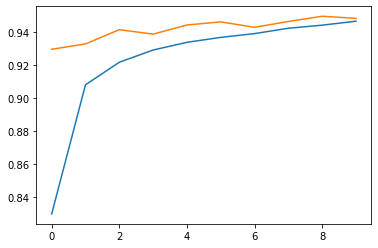

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

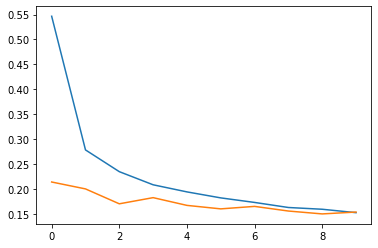

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [37]:
model.evaluate(x_test, y_test)

650/650 [==============================] - 2s 3ms/step - loss: 0.1600 - accuracy: 0.9470


[0.16000248491764069, 0.9470192193984985]